# Seaborn - grids and customization

**ToC**
 - [Pairgrids](#Pairgrids)
 - [FacetGrid](#FacetGrid)
 - [Customizing grids](#Customizing-grids)
 - [Fig and font size](#Fig-and-font-size)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris= sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Pairgrids
Pairgrid is similar to `pairplot`, except, it returns back an empty grid that you can fill up with desired plots later. Refresher on [pariplot](https://atmamani.github.io/talks/cheatsheets/seaborn_cheat_sheet_1.html#Plotting-dist-of-all-variables)

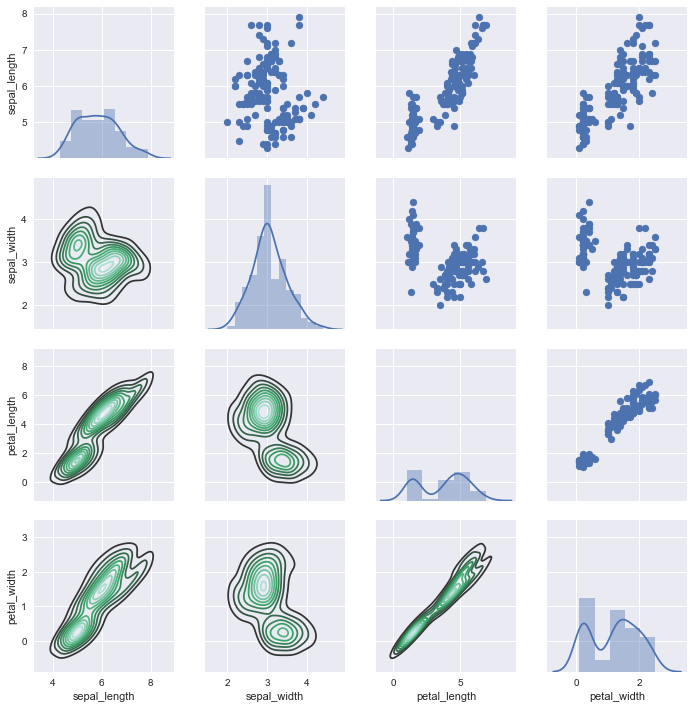

In [6]:
grd = sns.PairGrid(data=iris)

#then you can assign what you want plotted for diagonal, above diagonal, below diagonal.
# when mapping, pass just function pointers, dont call the function itself.
grd.map_diag(sns.distplot)
grd.map_upper(plt.scatter)
grd.map_lower(sns.kdeplot)

## FacetGrid
During EDA, you want to find the distribution of data by sub-categories, sub-conditions. You can do so by building FacetGrids. As it means, you get a grid for every facet of the data.

In [7]:
#load tips data
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Suppose we want to visualize `total_bill` by time of day and wheather or not it was a smoker. You need to filter data out then make dist plots. YOu can do all of that in 1 step with `FacetGrid`s.

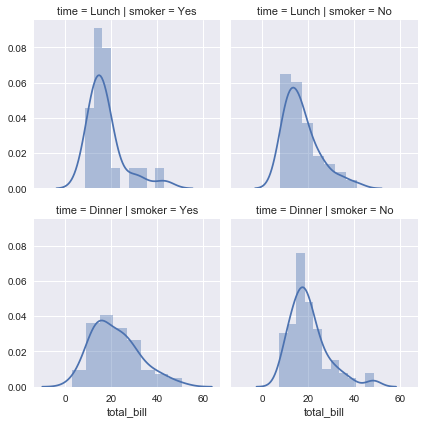

In [12]:
#for each unique value in `time` you get a row and 
# each unique value in `smoker` you get a col
fg = sns.FacetGrid(data=tips, row='time', col='smoker')

#now map a plot for each of the grid
fg.map(sns.distplot, 'total_bill')

## Customizing grids
If you dont like the pale blue background of seaborn plots, you can modify that with `set_style`.
<blockquote><b>Note:</b> Using set_style() will control the appearance for the entire notebook and all future plots</blockquote>

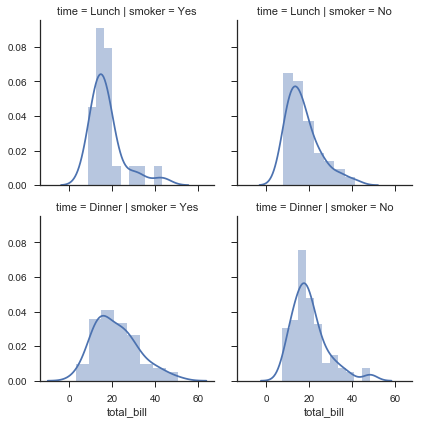

In [16]:
sns.set_style(style='ticks') #ticks, white, dark, darkgrid, whitegrid
#redraw the facet grid from above
fg = sns.FacetGrid(data=tips, row='time', col='smoker')

#now map a plot for each of the grid
fg.map(sns.distplot, 'total_bill')

## Fig and font size
You can use matplotlib `figsize` but have to specify that as a context as well.

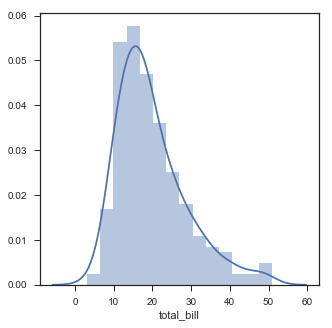

In [24]:
plt.figure(figsize=(5,5)) #generate a fig, sns will piggyback this with the plot
sns.distplot(tips['total_bill'])

### Using seaborn context
You can use the `set_context()` to pick sizing templates

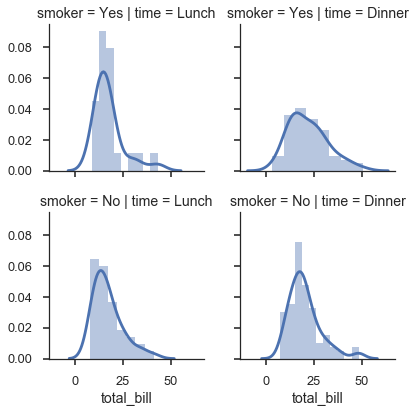

In [31]:
sns.set_context(context='poster', font_scale=0.8)
# valid contexts = paper, notebook, talk, poster - 
# with notebook being 1:1 and paper being smaller and poster being largest

#draw the facet grid
fg = sns.FacetGrid(data=tips, row='smoker', col='time')
fg.map(sns.distplot, 'total_bill')

Another way to set the size is to access the `fig` handle direclty

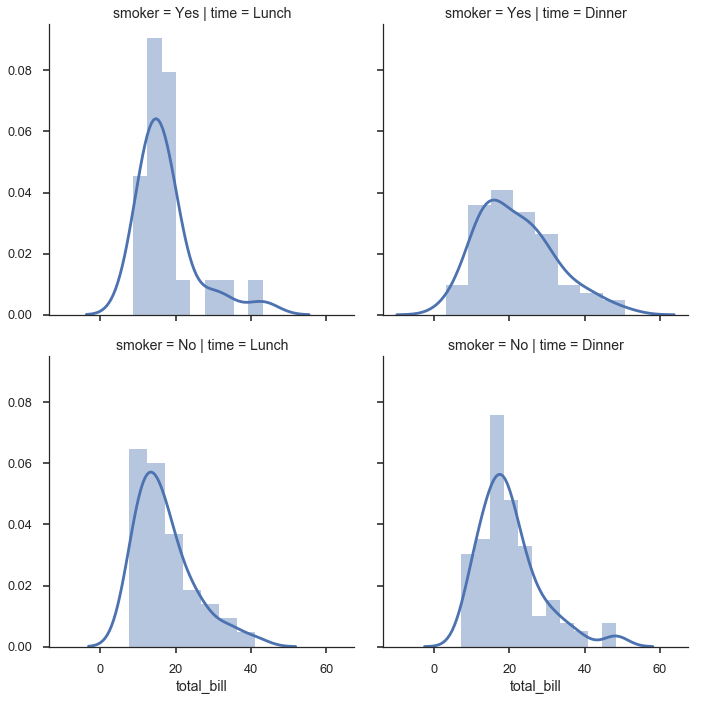

In [35]:
#draw the facet grid
fg = sns.FacetGrid(data=tips, row='smoker', col='time')
#set the size
fg.fig.set_size_inches(w=10, h=10)
#plot the fig
fg.map(sns.distplot, 'total_bill')